In [3]:
import cv2

In [4]:
img=cv2.imread(r'C:\DL Projects\License Plate detection\Lada_Russian_cars_Tuning_2106_Red_562017_1280x853.jpg')
img

array([[[112, 160, 208],
        [120, 168, 216],
        [120, 165, 216],
        ...,
        [239, 234, 235],
        [244, 239, 240],
        [239, 235, 234]],

       [[112, 160, 208],
        [120, 168, 216],
        [120, 165, 216],
        ...,
        [239, 234, 235],
        [243, 238, 239],
        [240, 236, 235]],

       [[113, 161, 209],
        [120, 168, 216],
        [120, 165, 216],
        ...,
        [238, 236, 236],
        [241, 236, 237],
        [240, 236, 235]],

       ...,

       [[192, 197, 195],
        [175, 180, 178],
        [183, 190, 187],
        ...,
        [182, 188, 187],
        [178, 186, 185],
        [171, 179, 178]],

       [[176, 181, 179],
        [175, 180, 178],
        [187, 194, 191],
        ...,
        [171, 177, 176],
        [169, 175, 174],
        [169, 177, 176]],

       [[172, 177, 176],
        [188, 193, 192],
        [185, 192, 189],
        ...,
        [172, 178, 177],
        [170, 176, 175],
        [172, 178, 177]]

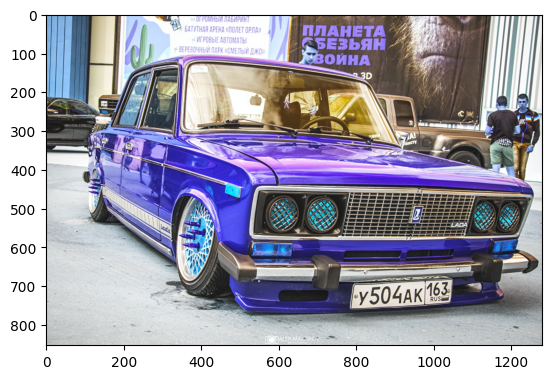

In [5]:
import matplotlib.pyplot as plt
plt.imshow(img)

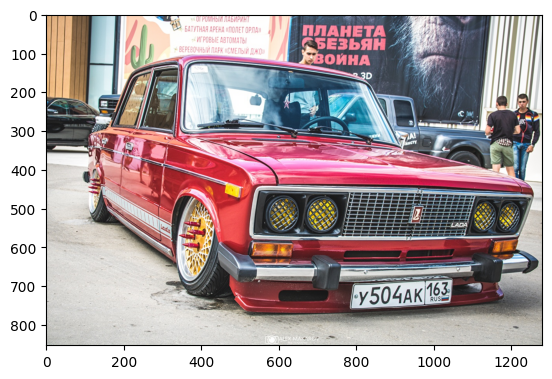

In [7]:
con_img=cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
plt.imshow(con_img)

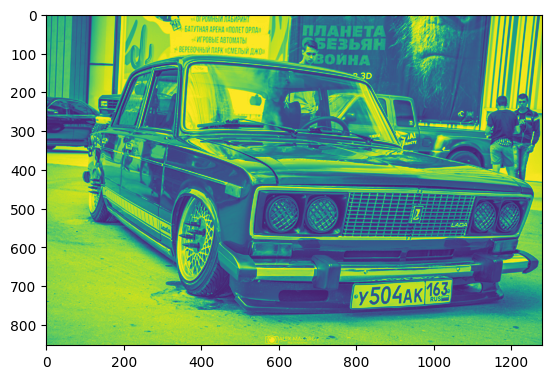

In [8]:
img_g=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.imshow(img_g)

In [9]:
img_g

array([[151, 159, 157, ..., 236, 241, 236],
       [151, 159, 157, ..., 236, 240, 237],
       [152, 159, 157, ..., 237, 238, 237],
       ...,
       [195, 178, 188, ..., 186, 183, 176],
       [179, 178, 192, ..., 175, 173, 174],
       [175, 191, 190, ..., 176, 174, 176]], dtype=uint8)

In [10]:
plate_cas=cv2.CascadeClassifier(r'C:\DL Projects\License Plate detection\haarcascade_russian_plate_number.xml')
plate_cas

< cv2.CascadeClassifier 00000187A4AE68D0>

In [14]:
plate=plate_cas.detectMultiScale(img_g,minNeighbors=30,scaleFactor=1.1)
plate

array([[770, 672, 289,  96]])

In [15]:
len(plate)

1

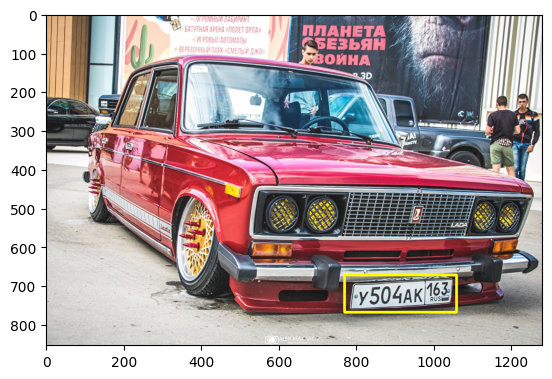

In [16]:
for(x,y,w,h) in plate:
    cv2.rectangle(con_img,(x,y),(x+w,y+h),(255,255,0),6)
plt.imshow(con_img)

License plate video detection

In [35]:
video=cv2.VideoCapture(r'C:\DL Projects\License Plate detection\pexels-hudson-coelho-5579752 (360p).mp4')
while True:
    suc,frame=video.read()
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    plates=plate_cas.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=3)
    # print(len(plates))
    for (x,y,w,h) in plates:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),6)
    cv2.imshow('video',frame)
    if cv2.waitKey(1) & 0XFF==ord('q'):
        break
video.release()
cv2.destroyAllWindows()